<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-data-in-pandas" data-toc-modified-id="Time-data-in-pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time data in pandas</a></span><ul class="toc-item"><li><span><a href="#Resampling" data-toc-modified-id="Resampling-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resampling</a></span></li><li><span><a href="#Moving-Average" data-toc-modified-id="Moving-Average-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Moving Average</a></span></li><li><span><a href="#Trend" data-toc-modified-id="Trend-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Seasonality</a></span></li><li><span><a href="#Cycles" data-toc-modified-id="Cycles-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Cycles</a></span></li></ul></li><li><span><a href="#Decomposing-a-time-series-with-statsmodels" data-toc-modified-id="Decomposing-a-time-series-with-statsmodels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decomposing a time series with statsmodels</a></span><ul class="toc-item"><li><span><a href="#Multiplicative" data-toc-modified-id="Multiplicative-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Multiplicative</a></span></li><li><span><a href="#Fitting-the-trend" data-toc-modified-id="Fitting-the-trend-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fitting the trend</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Quadratic-regression" data-toc-modified-id="Quadratic-regression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Quadratic regression</a></span></li><li><span><a href="#Exponential-regression" data-toc-modified-id="Exponential-regression-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Exponential regression</a></span></li><li><span><a href="#Comparing-regressions" data-toc-modified-id="Comparing-regressions-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Comparing regressions</a></span></li></ul></li><li><span><a href="#Filtering-low-frequencies" data-toc-modified-id="Filtering-low-frequencies-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filtering low frequencies</a></span><ul class="toc-item"><li><span><a href="#Adding-up-waves" data-toc-modified-id="Adding-up-waves-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Adding up waves</a></span></li><li><span><a href="#Fourier-transforms" data-toc-modified-id="Fourier-transforms-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fourier transforms</a></span></li></ul></li></ul></div>

In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Time data in pandas

In [528]:
### Pandas Datetime index
pd.date_range(
    start="24/11/2020", 
    periods=20, 
    freq="D"
)

DatetimeIndex(['2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13'],
              dtype='datetime64[ns]', freq='D')

In [529]:
days = pd.date_range(
    start="24/11/2020", 
    end="24/12/2020", 
    freq="D"
)

days

DatetimeIndex(['2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13',
               '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24'],
              dtype='datetime64[ns]', freq='D')

In [530]:
days.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'],
      dtype='object')

In [531]:
lst = ["13/06/1975", "6/09/1975", "20/12/1975"]
pd.to_datetime(lst)

DatetimeIndex(['1975-06-13', '1975-06-09', '1975-12-20'], dtype='datetime64[ns]', freq=None)

In [532]:
my_time = "July 6th 1982 11h"

In [533]:
pd.to_datetime(my_time)

Timestamp('1982-07-06 11:00:00')

In [534]:
my_time2 = "September 9th 1983 17h"

In [535]:
pd.to_datetime(my_time2)

Timestamp('1983-09-09 17:00:00')

In [536]:
pd.to_datetime(my_time) - pd.to_datetime(my_time2)

Timedelta('-431 days +18:00:00')

In [537]:
pd.date_range("24/11/2020", "25/11/2020", freq="H")

DatetimeIndex(['2020-11-24 00:00:00', '2020-11-24 01:00:00',
               '2020-11-24 02:00:00', '2020-11-24 03:00:00',
               '2020-11-24 04:00:00', '2020-11-24 05:00:00',
               '2020-11-24 06:00:00', '2020-11-24 07:00:00',
               '2020-11-24 08:00:00', '2020-11-24 09:00:00',
               '2020-11-24 10:00:00', '2020-11-24 11:00:00',
               '2020-11-24 12:00:00', '2020-11-24 13:00:00',
               '2020-11-24 14:00:00', '2020-11-24 15:00:00',
               '2020-11-24 16:00:00', '2020-11-24 17:00:00',
               '2020-11-24 18:00:00', '2020-11-24 19:00:00',
               '2020-11-24 20:00:00', '2020-11-24 21:00:00',
               '2020-11-24 22:00:00', '2020-11-24 23:00:00',
               '2020-11-25 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In [538]:
df = pd.DataFrame()
df["date"] = pd.date_range("24/11/2020", "24/12/2020", freq="D")
df = df.set_index("date")

In [539]:
df["values"] = np.random.randint(500, 3000, 31)

In [540]:
df.head(10)

,values
date,
2020-11-24,1592
2020-11-25,1048
2020-11-26,568
2020-11-27,2408
2020-11-28,2599
2020-11-29,1484
2020-11-30,2830
2020-12-01,2462
2020-12-02,1377


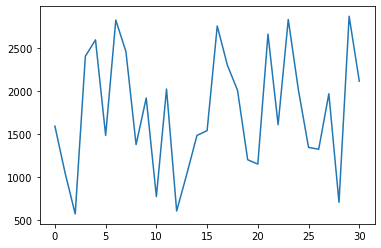

In [541]:
plt.plot(df.values)

In [542]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
    parse_dates=['date'], index_col="date"
)

In [543]:
df.head(10)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


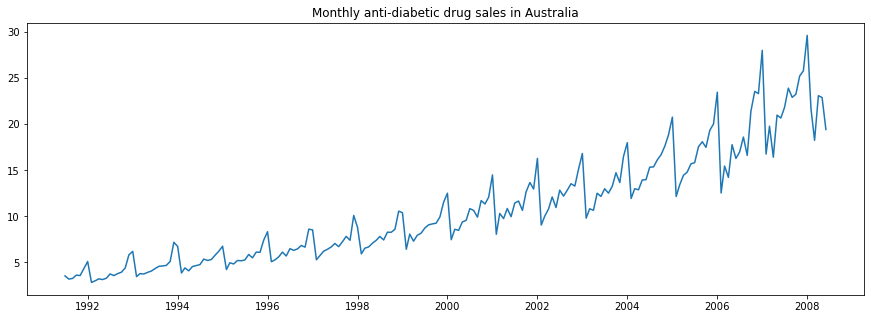

In [544]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.title("Monthly anti-diabetic drug sales in Australia");

### Resampling

In [545]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [546]:
df.resample(rule="A").mean().head()

,value
date,
1991-12-31,3.573824
1992-12-31,3.807246
1993-12-31,4.627724
1994-12-31,5.068007
1995-12-31,5.610550


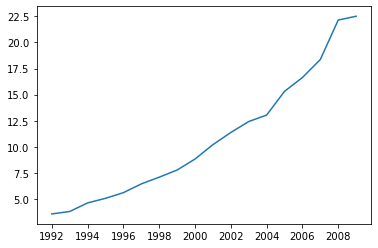

In [547]:
plt.plot(df.resample(rule="A").mean())

### Moving Average

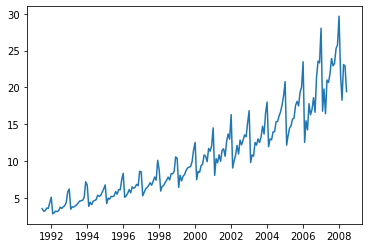

In [548]:
plt.plot(df)

In [549]:
mean = df.value.mean()

In [550]:
mean

10.694429582156861

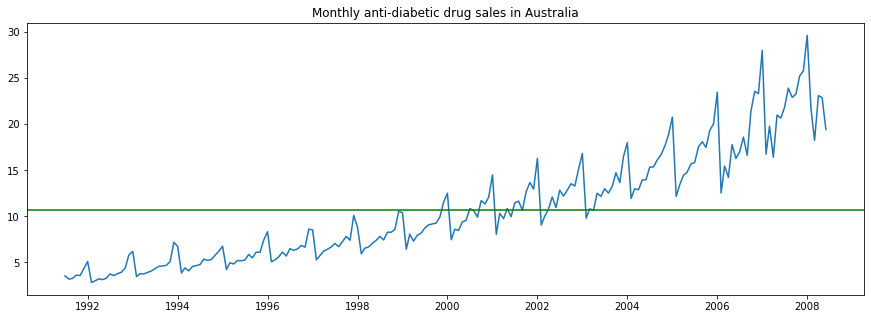

In [551]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.axhline(mean, c="g")
plt.title("Monthly anti-diabetic drug sales in Australia");

In [552]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [553]:
df.rolling(window=2).mean()

,value
date,
1991-07-01,NaN
1991-08-01,3.353741
1991-09-01,3.216556
1991-10-01,3.431612
1991-11-01,3.588436
...,...
2008-02-01,25.659821
2008-03-01,19.959615
2008-04-01,20.686311


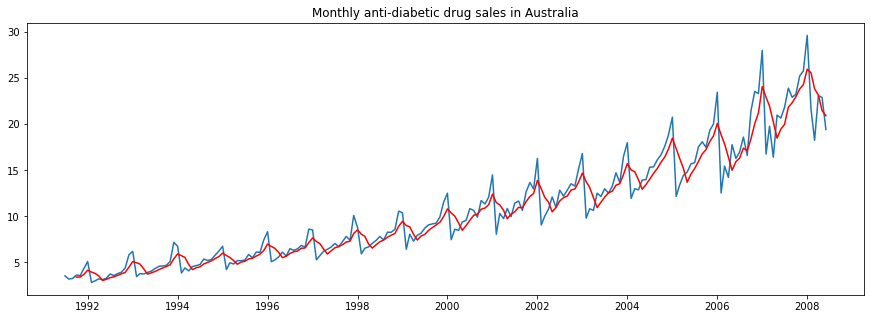

In [554]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.rolling(window=4).mean(), c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

In [555]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


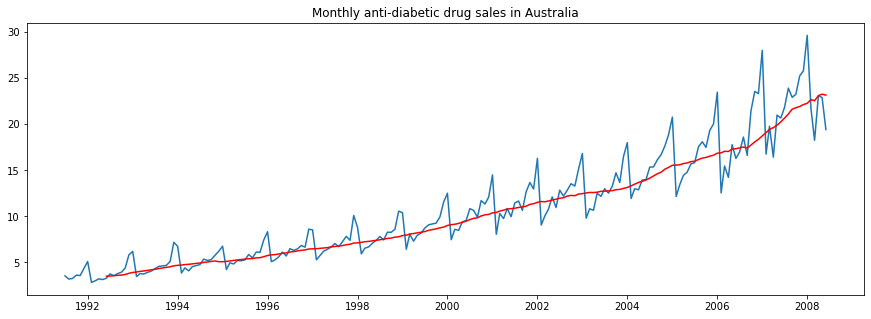

In [556]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.rolling(window=12).mean(), c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

### Trend
    How the average changes through time

### Seasonality
    Repetitive pattern of peaks and droughts with a regular interval
    Usually relates to an interval of the calendar

![](https://assets.datacamp.com/production/repositories/684/datasets/9013c4b95cae33e4c24cfab6f3e9760f26e40351/ch1_vid2_aus_brick.png)

### Cycles
    Patterns repeated in uneven intervals or that do not relate to a period of the calendar.
    In general, they have a longer interval than seasons, and a larger amplitude of variation.

## Decomposing a time series with statsmodels

In [557]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [558]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [559]:
res = seasonal_decompose(df.value, model="additive")

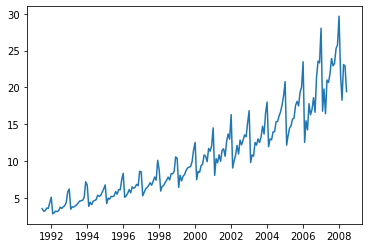

In [560]:
plt.plot(df.value)

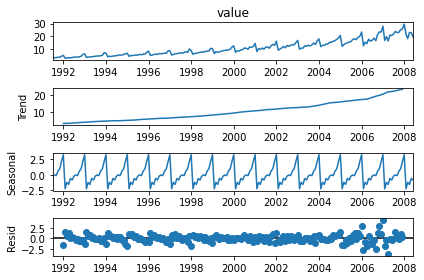

In [561]:
res.plot();

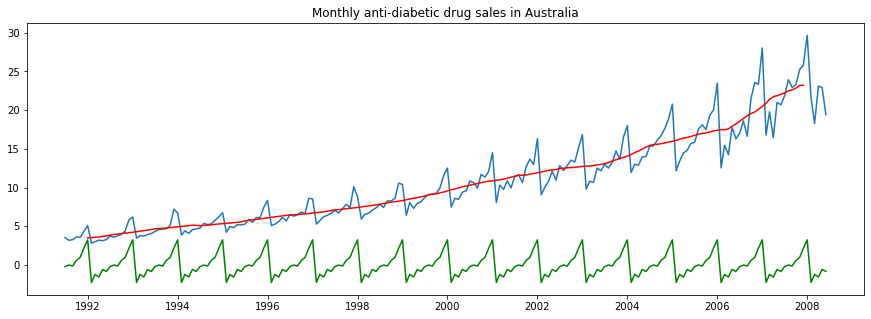

In [562]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(res.seasonal, c="g")
plt.plot(res.trend, c='r')
plt.title("Monthly anti-diabetic drug sales in Australia");

The model is called additive because:

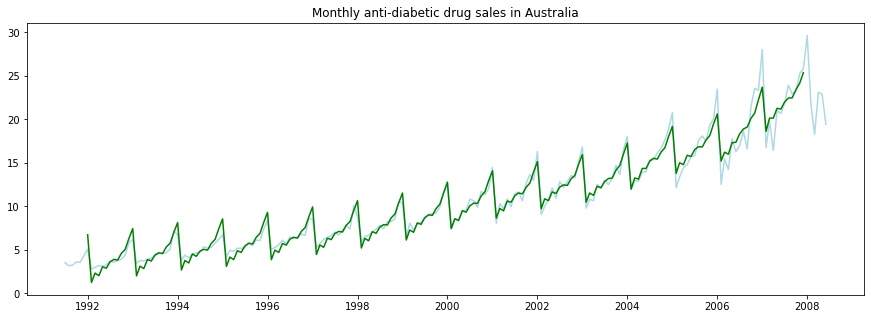

In [563]:
plt.figure(figsize=(15,5))
plt.plot(df.value, c="lightblue")
plt.plot(res.seasonal + res.trend, c="g")
plt.title("Monthly anti-diabetic drug sales in Australia");

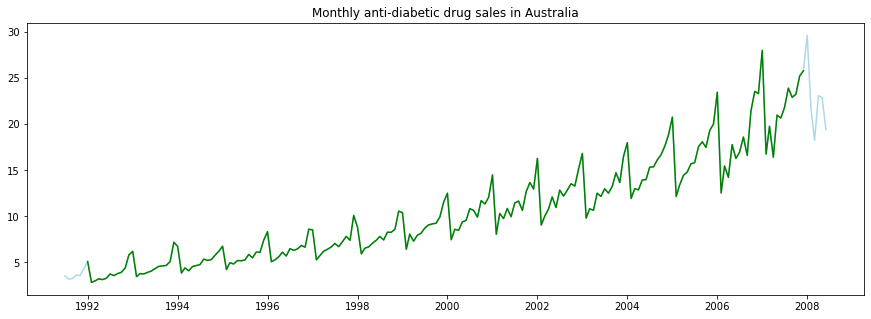

In [564]:
plt.figure(figsize=(15,5))
plt.plot(df.value, c="lightblue")
plt.plot(res.seasonal + res.trend + res.resid, c="g")
plt.title("Monthly anti-diabetic drug sales in Australia");

What type of trend do we have?

### Multiplicative

In [565]:
res = seasonal_decompose(df.value, model="multiplicative")

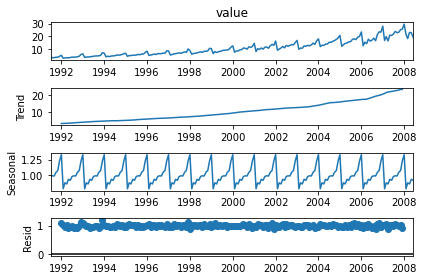

In [566]:
res.plot();

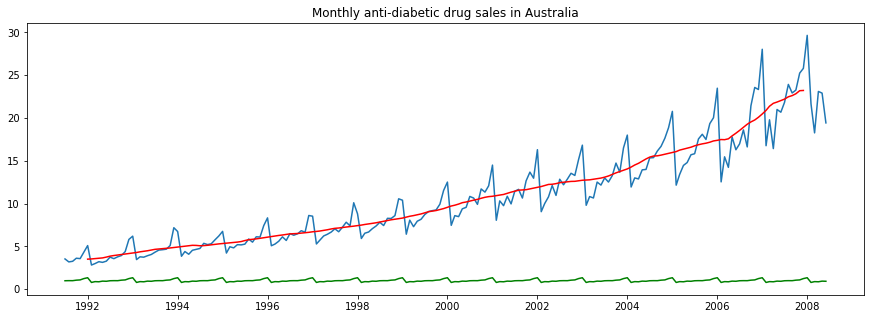

In [567]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(res.seasonal, c="g")
plt.plot(res.trend, c='r')
plt.title("Monthly anti-diabetic drug sales in Australia");

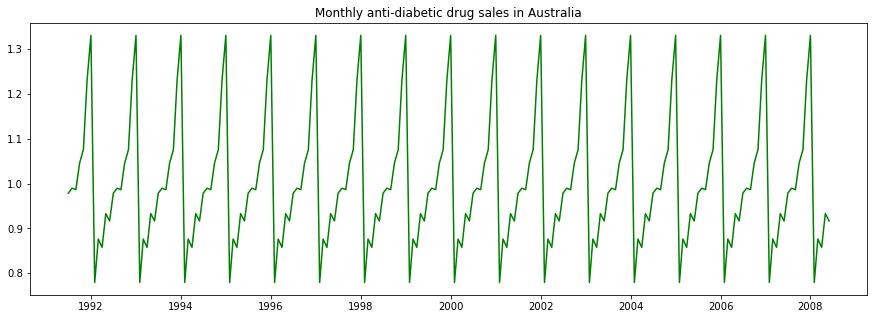

In [568]:
plt.figure(figsize=(15,5))
plt.plot(res.seasonal, c="g")
plt.title("Monthly anti-diabetic drug sales in Australia");

The model is called multiplicative because:

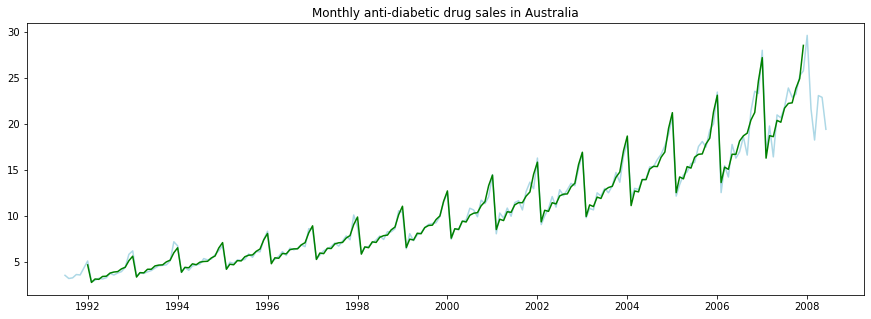

In [569]:
plt.figure(figsize=(15,5))
plt.plot(df.value, c="lightblue")
plt.plot(res.seasonal * res.trend, c="g")
plt.title("Monthly anti-diabetic drug sales in Australia");

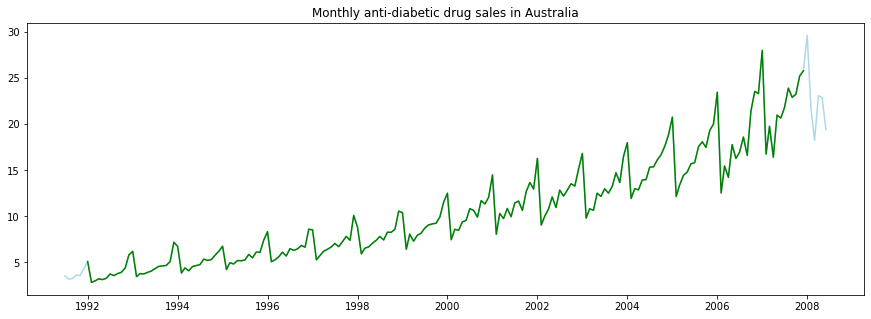

In [570]:
plt.figure(figsize=(15,5))
plt.plot(df.value, c="lightblue")
plt.plot(res.seasonal * res.trend * res.resid, c="g")
plt.title("Monthly anti-diabetic drug sales in Australia");

What type of trend do we have?

### Fitting the trend

In [571]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [572]:
# Linear regression
from sklearn.linear_model import LinearRegression

In [573]:
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [574]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [575]:
df.shape

(204, 1)

In [576]:
df["day"] = (df.index - df.index[0]).days

In [577]:
df.head()

,value,day
date,,
1991-07-01,3.526591,0
1991-08-01,3.180891,31
1991-09-01,3.252221,62
1991-10-01,3.611003,92
1991-11-01,3.565869,123


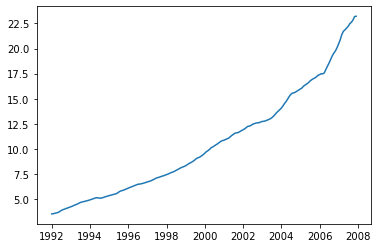

In [578]:
plt.plot(res.trend)

### Linear regression

$$value = m * day + n$$

In [579]:
lr = LinearRegression()
lr.fit(
    df[["day"]], 
    df.value
)

LinearRegression()

In [580]:
df.head()

,value,day
date,,
1991-07-01,3.526591,0
1991-08-01,3.180891,31
1991-09-01,3.252221,62
1991-10-01,3.611003,92
1991-11-01,3.565869,123


In [581]:
lr.predict(df[["day"]])[:10]

array([1.22047005, 1.31550237, 1.4105347 , 1.50250146, 1.59753379,
       1.68950056, 1.78453288, 1.87956521, 1.96846642, 2.06349875])

In [582]:
df["pred_linear"] = lr.predict(df[["day"]])

In [583]:
df.head()

,value,day,pred_linear
date,,,
1991-07-01,3.526591,0,1.220470
1991-08-01,3.180891,31,1.315502
1991-09-01,3.252221,62,1.410535
1991-10-01,3.611003,92,1.502501
1991-11-01,3.565869,123,1.597534


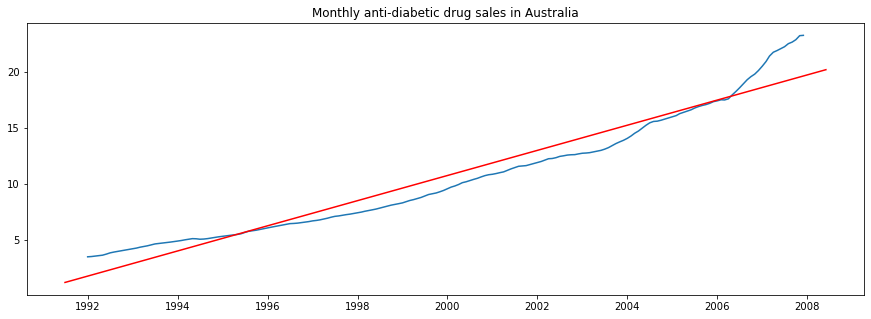

In [584]:
plt.figure(figsize=(15,5))
plt.plot(res.trend)
plt.plot(df.pred_linear ,c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

### Quadratic regression

$$value = m * day^2 + n$$

In [585]:
df["day_squared"] = df.day ** 2

In [586]:
df.head()

,value,day,pred_linear,day_squared
date,,,,
1991-07-01,3.526591,0,1.220470,0
1991-08-01,3.180891,31,1.315502,961
1991-09-01,3.252221,62,1.410535,3844
1991-10-01,3.611003,92,1.502501,8464
1991-11-01,3.565869,123,1.597534,15129


In [587]:
lr2 = LinearRegression()
lr2.fit(
    df[["day_squared"]], 
    df.value
)

LinearRegression()

In [588]:
df["pred_quadratic"] = lr2.predict(df[["day_squared"]])

In [589]:
df.head()

,value,day,pred_linear,day_squared,pred_quadratic
date,,,,,
1991-07-01,3.526591,0,1.220470,0,4.412859
1991-08-01,3.180891,31,1.315502,961,4.413332
1991-09-01,3.252221,62,1.410535,3844,4.414751
1991-10-01,3.611003,92,1.502501,8464,4.417025
1991-11-01,3.565869,123,1.597534,15129,4.420305


In [590]:
df.sample(5)

,value,day,pred_linear,day_squared,pred_quadratic
date,,,,,
2001-10-01,12.652134,3745,12.700988,14025025,11.315234
1995-06-01,5.170787,1431,5.607285,2047761,5.420659
1997-03-01,5.714303,2070,7.566177,4284900,6.521660
1998-11-01,8.596156,2680,9.436168,7182400,7.947656
1996-10-01,6.828629,1919,7.103278,3682561,6.225221


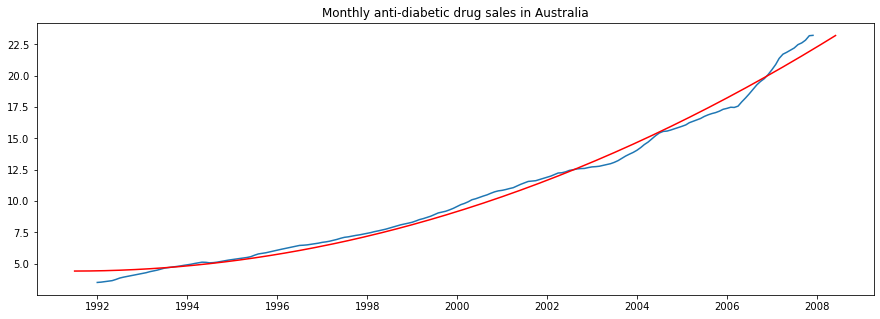

In [591]:
plt.figure(figsize=(15,5))
plt.plot(res.trend)
plt.plot(df.pred_quadratic ,c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

### Exponential regression

$$value = k * e^{a * day}$$

$$log(value) = log(k * e^{a * day}) = log(k) + a * day$$

In [592]:
import numpy as np

In [593]:
df["log_value"] = np.log(df.value)

In [594]:
df.head()

,value,day,pred_linear,day_squared,pred_quadratic,log_value
date,,,,,,
1991-07-01,3.526591,0,1.220470,0,4.412859,1.260332
1991-08-01,3.180891,31,1.315502,961,4.413332,1.157161
1991-09-01,3.252221,62,1.410535,3844,4.414751,1.179338
1991-10-01,3.611003,92,1.502501,8464,4.417025,1.283986
1991-11-01,3.565869,123,1.597534,15129,4.420305,1.271408


In [595]:
lr3 = LinearRegression()
lr3.fit(
    df[["day"]], 
    df.log_value
)

LinearRegression()

In [596]:
df["pred_exp"] = np.exp(lr3.predict(df[["day"]]))

In [597]:
df.head()

,value,day,pred_linear,day_squared,pred_quadratic,log_value,pred_exp
date,,,,,,,
1991-07-01,3.526591,0,1.220470,0,4.412859,1.260332,3.549056
1991-08-01,3.180891,31,1.315502,961,4.413332,1.157161,3.582910
1991-09-01,3.252221,62,1.410535,3844,4.414751,1.179338,3.617087
1991-10-01,3.611003,92,1.502501,8464,4.417025,1.283986,3.650472
1991-11-01,3.565869,123,1.597534,15129,4.420305,1.271408,3.685293


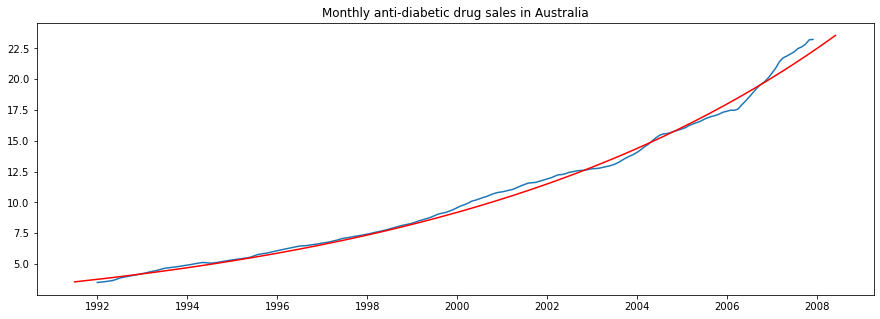

In [598]:
plt.figure(figsize=(15,5))
plt.plot(res.trend)
plt.plot(df.pred_exp ,c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

### Comparing regressions

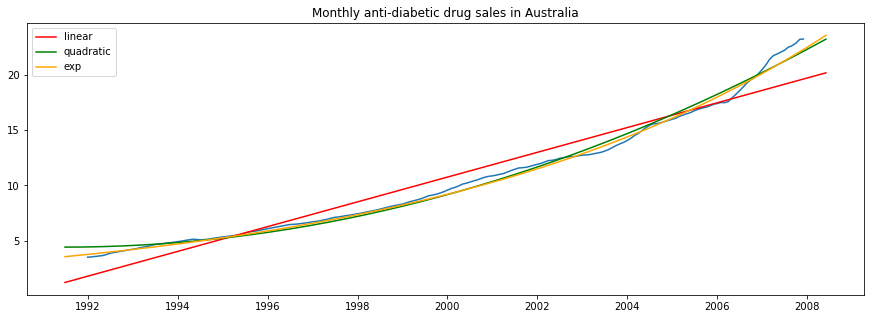

In [599]:
plt.figure(figsize=(15,5))
plt.plot(res.trend)
plt.plot(df.pred_linear ,c="r", label="linear")
plt.plot(df.pred_quadratic ,c="g", label="quadratic")
plt.plot(df.pred_exp ,c="orange", label="exp")

plt.title("Monthly anti-diabetic drug sales in Australia");

plt.legend()

In [600]:
df.head()

,value,day,pred_linear,day_squared,pred_quadratic,log_value,pred_exp
date,,,,,,,
1991-07-01,3.526591,0,1.220470,0,4.412859,1.260332,3.549056
1991-08-01,3.180891,31,1.315502,961,4.413332,1.157161,3.582910
1991-09-01,3.252221,62,1.410535,3844,4.414751,1.179338,3.617087
1991-10-01,3.611003,92,1.502501,8464,4.417025,1.283986,3.650472
1991-11-01,3.565869,123,1.597534,15129,4.420305,1.271408,3.685293


In [601]:
((df.pred_linear - df.value) ** 2).mean()

5.1198824621362355

In [602]:
((df.pred_quadratic - df.value) ** 2).mean()

3.5846239586500763

In [603]:
((df.pred_exp - df.value) ** 2).mean()

3.4806737592042176

Exponential fit wins!!

## Filtering low frequencies

### Adding up waves

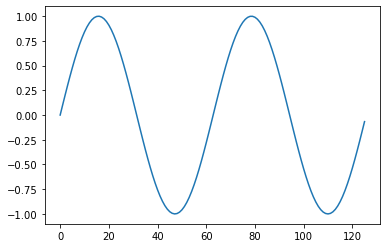

In [604]:
x = np.arange(0, 4*np.pi, .1)
plt.plot(np.sin(x))

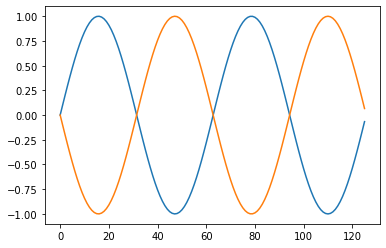

In [605]:
plt.plot(np.sin(x))
plt.plot(-np.sin(x))

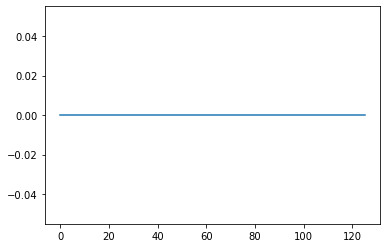

In [606]:
plt.plot(np.sin(x) - np.sin(x))

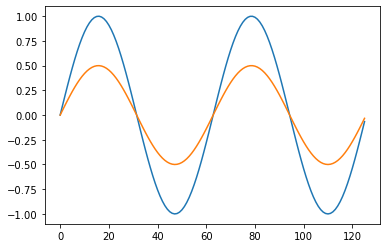

In [607]:
plt.plot(np.sin(x))
plt.plot(0.5 * np.sin(x))

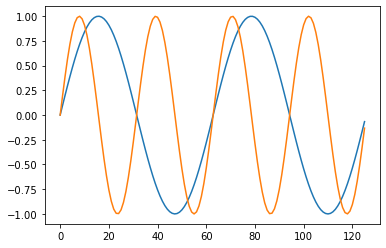

In [608]:
plt.plot(np.sin(x))
plt.plot(np.sin(2 * x))

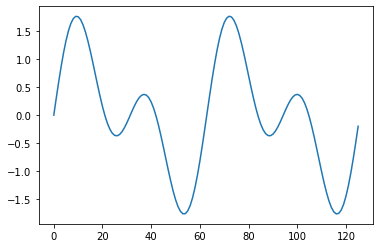

In [609]:
plt.plot(np.sin(x) + np.sin(2 * x))

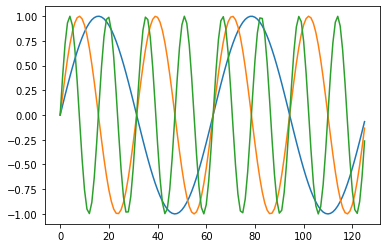

In [610]:
plt.plot(np.sin(x))
plt.plot(np.sin(2 * x))
plt.plot(np.sin(4 * x))

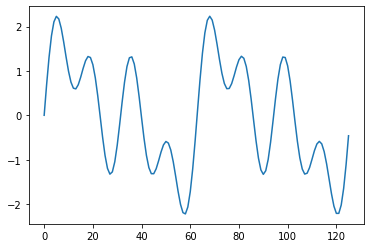

In [611]:
plt.plot(np.sin(x) + np.sin(2 * x) + np.sin(4 * x))

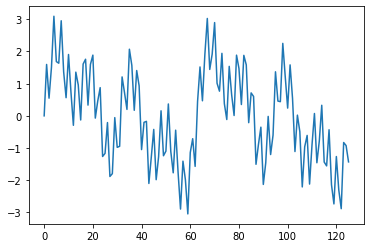

In [612]:
plt.plot(np.sin(x) + np.sin(2 * x) + np.sin(4 * x) + np.sin(20 * x))

### Fourier transforms

In [613]:
from scipy.fft import fft, fftfreq, fftshift

In [614]:
ft = fft(np.sin(x))

In [615]:
sp = fftshift(ft)

In [616]:
freq = fftshift(fftfreq(len(x)))

In [617]:
df = pd.DataFrame({"freq": freq, "value": sp.real})
df = df[df.value>0]
df

,freq,value
61,-0.015873,1.043825
65,0.015873,1.043825


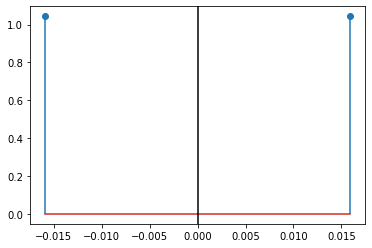

In [618]:
plt.stem(df.freq,df.value)
plt.axvline(0,c="k")

In [619]:
x = np.sin(x) + np.sin(4 * x)

In [620]:
ft = fft(x)
sp = fftshift(ft)
freq = fftshift(fftfreq(len(x)))
df = pd.DataFrame({"freq":freq,"value":sp.real})
df = df[df.value>0]
df

,freq,value
55,-0.063492,4.152015
56,-0.055556,0.010030
61,-0.015873,1.000549
65,0.015873,1.000549
70,0.055556,0.010030
71,0.063492,4.152015


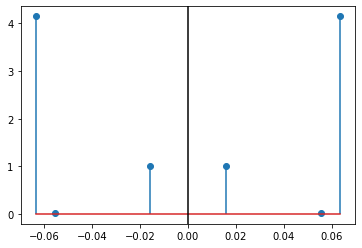

In [621]:
plt.stem(df.freq,df.value)
plt.axvline(0,c="k")

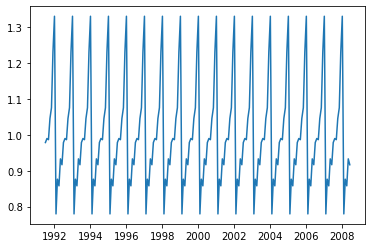

In [644]:
plt.plot(res.seasonal)

In [645]:
ft = fft(res.seasonal.values)
sp = fftshift(ft)
freq = fftshift(fftfreq(len(res.seasonal.values)))
df = pd.DataFrame({"freq":freq,"value":sp.real})
df = df[df.value>0]
df

,freq,value
0,-0.500000,6.136056e+00
1,-0.495098,4.218689e-16
2,-0.490196,2.796163e-15
15,-0.426471,1.662098e-15
19,-0.406863,3.047321e-15
...,...,...
184,0.401961,6.001486e-16
185,0.406863,3.047321e-15
189,0.426471,1.662098e-15
202,0.490196,2.796163e-15


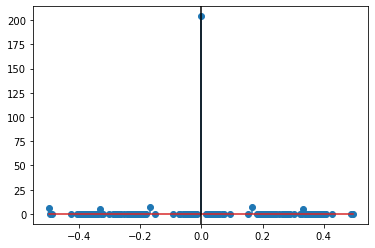

In [646]:
plt.stem(df.freq,df.value)
plt.axvline(0,c="k")

In [647]:
def fourier(x):
    ft = fft(x)
    sp = fftshift(ft)
    freq = fftshift(fftfreq(len(x)))
    df = pd.DataFrame({"freq":freq,"value":sp.real})
    df = df[df.value>0.5]
    return df

In [648]:
x = np.linspace(0,4*np.pi,1000)
sig = np.zeros(x.shape)
for f in [1, 3, 5, 7, 40]:
    sig += np.sin(x*f)

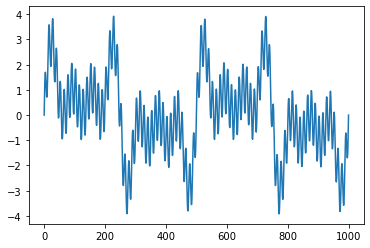

In [649]:
plt.plot(sig)

In [650]:
ft = fourier(sig)

<StemContainer object of 3 artists>

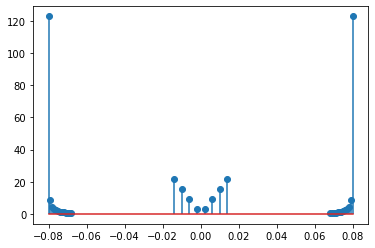

In [651]:
plt.stem(ft["freq"], ft["value"])

## TS forecasting using Auto ARIMA
Taken from [here](https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd)

In [652]:
# ! pip3 install pmdarima
from pmdarima.arima import auto_arima


ImportError: cannot import name 'InfeasibleTestError' from 'statsmodels.tools.sm_exceptions' (/Users/alejandrocampos/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/sm_exceptions.py)

In [653]:
sales_data = pd.read_csv('../data/Champagne Sales.csv')

In [654]:
sales_data['Month']=pd.to_datetime(sales_data['Month'])

In [655]:
sales_data = sales_data.set_index('Month')
sales_data

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


<AxesSubplot:xlabel='Month'>

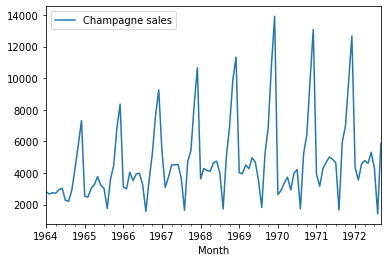

In [663]:
sales_data.plot()

In [664]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

ImportError: cannot import name 'InfeasibleTestError' from 'statsmodels.tools.sm_exceptions' (/Users/alejandrocampos/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/sm_exceptions.py)

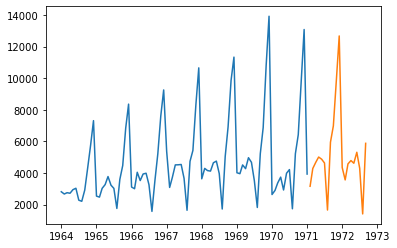

In [665]:
#Spliting the dataset into train and test
train = sales_data[:85]
test = sales_data[-20:]

plt.plot(train)
plt.plot(test)


In [666]:
# Setting up our ARIMA model
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

NameError: name 'auto_arima' is not defined

In [667]:
arima_model.summary()

NameError: name 'arima_model' is not defined

In [668]:
# Forecasting on test data
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

NameError: name 'arima_model' is not defined

NameError: name 'prediction' is not defined

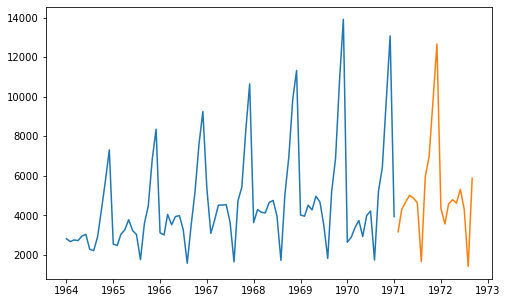

In [669]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()